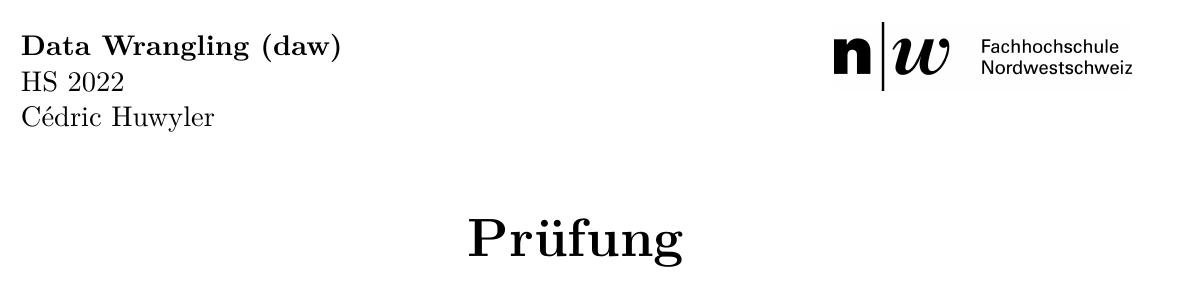

Imports (kann bei Bedarf erweitert werden):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\denis\AppData\Local\Temp\ipykernel_27304\3538350959.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


verwendete Versionen:

In [2]:
pd.__version__

'2.2.0'

In [3]:
np.__version__

'1.23.3'

## Aufgabe 1 (39 Punkte)

Im Rahmen eines nationalen Präventionsprogramms soll untersucht werden, welche Art von Verbrechen in welchen Schweizer Kantonen wie häufig vorkommen. Du bekommst die Data Science - Aufgaben des Projekts zugewiesen und sollst als erstes die [Daten des Bundesamts für Statistik](https://www.pxweb.bfs.admin.ch/pxweb/de/px-x-1903020100_101/-/px-x-1903020100_101.px/) (Link nur zur Vollständigkeit, siehe `Straftaten.xlsx`) so aufbereiten, dass sie vom Rest deines Teams für weitere Analysen genutzt werden können.

### a) (21 Punkte)

Du ziehst dir als erstes einen Excel-Auszug der Statistiken der letzten Jahre (bereits für dich erledigt - siehe  `Straftaten.xlsx`) und führst die nötigen Data Wrangling - Schritte durch, um folgendes Format zu erhalten:

<br>

<div>
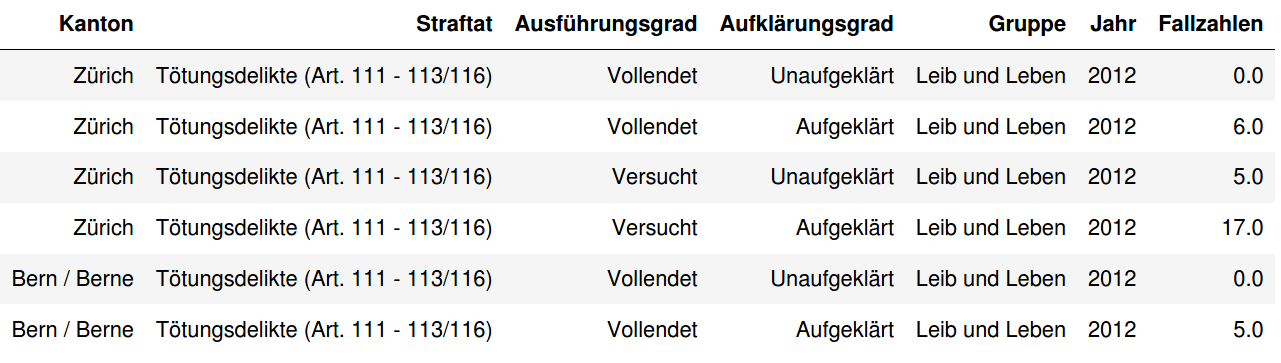
</div>

Stelle dabei sicher, dass

* allfällige fehlende Werte explizit mit NA bzw. NaN markiert sind.
* fehlende Werte wo nötig ergänzt sind (Hinweis: Im Excel-File heissen fehlende Werte meistens, dass der erste nicht-fehlende Wert weiter oben benutzt werden soll)
* das Jahr und die Fallzahlen als Integer oder Float vorliegen.

Die Deliktgruppe ("Gruppe") steht jeweils als Straftat am Ende einer Gruppe von Straftaten und ist beginnend mit "Total" codiert. Extrahiere diese Gruppennamen sauber (ohne Total, ohne führende oder folgende Leerzeichen) und entferne die Zeilen mit "Total" in der Straftat aus den Daten.

Führe alle Schritte ausschliesslich in Python oder R durch, Manipulationen des originalen Excel-Files sind nicht erlaubt.

In [6]:
import pandas as pd

df = pd.read_excel(
    "Straftaten.xlsx", header=2,  
    usecols="B, D, F, H:R"  
)
df.columns = ['Straftat', 'Kanton', 'Ausführungsgrad', 'Aufklärungsgrad'] + df.columns.tolist()[4:]
df

,Straftat,Kanton,Ausführungsgrad,Aufklärungsgrad,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Tötungsdelikte (Art. 111 - 113/116),Zürich,Vollendet,Unaufgeklärt,0,0,1,0,0,1,1,0,0,0
1,NaN,NaN,NaN,Aufgeklärt,6,5,9,8,10,6,6,16,6,5
2,NaN,NaN,Versucht,Unaufgeklärt,5,1,2,1,1,1,4,3,2,1
3,NaN,NaN,NaN,Aufgeklärt,17,22,21,24,25,29,28,33,40,27
4,NaN,Bern / Berne,Vollendet,Unaufgeklärt,0,2,0,2,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Gruppen Hinzufügen

In [46]:
df['Gruppe'] = df['Straftat']
df['Gruppe'] = df[df['Gruppe'].str.contains("Total", na=False)].Gruppe

df['Gruppe'] = df['Gruppe'].apply(lambda x: x.str.split(':')[1])

df.iloc[1970:1985]

AttributeError: 'float' object has no attribute 'str'

In [78]:
df = pd.read_excel("Straftaten.xlsx", header=2, usecols="B,D,F,H,I:R", nrows=27040, na_values=["*", "X", "..."])

df.columns = ["Straftat", "Kanton", "Ausführungsgrad", "Aufklärungsgrad"] + df.columns.to_list()[4:]

df.Straftat = df.Straftat.ffill()

df["Gruppe"] = df.Straftat
df.Gruppe[~df.Gruppe.str.contains("Total")] = np.nan
df.Gruppe = df.Gruppe.bfill()
df.Gruppe = df.Gruppe.apply(lambda x: x.split(":")[1].strip())

df = df[~df.Straftat.str.contains("Total")]

df[["Kanton", "Ausführungsgrad"]] = df[["Kanton", "Ausführungsgrad"]].ffill()

df = df.melt(id_vars=["Kanton", "Straftat", "Ausführungsgrad", "Aufklärungsgrad", "Gruppe"], value_name="Fallzahlen", var_name="Jahr")

df

C:\Users\denis\AppData\Local\Temp\ipykernel_27304\3197916884.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gruppe[~df.Gruppe.str.contains("Total")] = np.nan


,Kanton,Straftat,Ausführungsgrad,Aufklärungsgrad,Gruppe,Jahr,Fallzahlen
0,Zürich,Tötungsdelikte (Art. 111 - 113/116),Vollendet,Unaufgeklärt,Leib und Leben,2012,0.0
1,Zürich,Tötungsdelikte (Art. 111 - 113/116),Vollendet,Aufgeklärt,Leib und Leben,2012,6.0
2,Zürich,Tötungsdelikte (Art. 111 - 113/116),Versucht,Unaufgeklärt,Leib und Leben,2012,5.0
3,Zürich,Tötungsdelikte (Art. 111 - 113/116),Versucht,Aufgeklärt,Leib und Leben,2012,17.0
4,Bern / Berne,Tötungsdelikte (Art. 111 - 113/116),Vollendet,Unaufgeklärt,Leib und Leben,2012,0.0
...,...,...,...,...,...,...,...
248555,Genève,Nichtanzeigen eines Fundes (Art. 332),Versucht,Aufgeklärt,Bundesrechtliche Bestimmungen,2021,0.0
248556,Jura,Nichtanzeigen eines Fundes (Art. 332),Vollendet,Unaufgeklärt,Bundesrechtliche Bestimmungen,2021,0.0
248557,Jura,Nichtanzeigen eines Fundes (Art. 332),Vollendet,Aufgeklärt,Bundesrechtliche Bestimmungen,2021,0.0
248558,Jura,Nichtanzeigen eines Fundes (Art. 332),Versucht,Unaufgeklärt,Bundesrechtliche Bestimmungen,2021,0.0


### b) (10 Punkte)

Für die Berechnung von relativen Häufigkeiten soll zusätzlich die Anzahl der Einwohner:innen pro Kanton und Jahr hinzugefügt werden. Du findest passende Daten in `einwohnerzahlen.txt`. Lese sie ein, präprozessiere sie wo nötig und füge sie an das bestehende Data Frame.

**Hinweise:** 

* Die Kantonsbezeichnungen stimmen nicht genau mit dem ersten Datensatz überein. Passe die Kantone im eingelesenen Einwohner-Data Frame entsprechend an, indem du dir zum Beispiel einen Matching-Table baust. Ein 'Kanton' ist überflüssig und kann entfernt werden - findest du heraus welchen?

* Aufpassen, falls du kategorische Datentypen gesetzt hast!

In [79]:
df_einwohner = pd.read_csv('einwohnerzahlen.txt', delimiter='; ')
df_einwohner = df_einwohner[df_einwohner['Kanton'] != 'Schweiz']
df_einwohner

C:\Users\denis\AppData\Local\Temp\ipykernel_27304\2803946851.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_einwohner = pd.read_csv('einwohnerzahlen.txt', delimiter='; ')


,Kanton,Jahr,Einwohnerzahl_Kanton
0,Aargau,2012,627340.0
1,Appenzell A. Rh.,2012,53438.0
2,Appenzell I. Rh.,2012,15717.0
3,Basel-Landschaft,2012,276537.0
4,Basel-Stadt,2012,187425.0
...,...,...,...
265,Uri,2021,37047.0
266,Waadt,2021,822968.0
267,Wallis,2021,353209.0
268,Zug,2021,129787.0


In [80]:
matching_table = {
    'Appenzell A. Rh.':'Appenzell Ausserrhoden',
    'Appenzell I. Rh.':'Appenzell Innerrhoden',
    'Bern':'Bern / Berne',
    'Freiburg':'Fribourg / Freiburg',
    'Genf':'Genève',
    'Graubünden':'Graubünden / Grigioni / Grischun',
    'Neuenburg':'Neuchâtel',
    'Tessin':'Ticino',
    'Waadt':'Vaud',
    'Wallis':'Valais / Wallis'
}

df_einwohner['Kanton'] = df_einwohner['Kanton'].replace(matching_table)
df_einwohner

,Kanton,Jahr,Einwohnerzahl_Kanton
0,Aargau,2012,627340.0
1,Appenzell Ausserrhoden,2012,53438.0
2,Appenzell Innerrhoden,2012,15717.0
3,Basel-Landschaft,2012,276537.0
4,Basel-Stadt,2012,187425.0
...,...,...,...
265,Uri,2021,37047.0
266,Vaud,2021,822968.0
267,Valais / Wallis,2021,353209.0
268,Zug,2021,129787.0


In [81]:
df.Jahr = df.Jahr.astype(int)

In [82]:
df = df.merge(df_einwohner, on=['Kanton', 'Jahr'])
df

,Kanton,Straftat,Ausführungsgrad,Aufklärungsgrad,Gruppe,Jahr,Fallzahlen,Einwohnerzahl_Kanton
0,Zürich,Tötungsdelikte (Art. 111 - 113/116),Vollendet,Unaufgeklärt,Leib und Leben,2012,0.0,1408575.0
1,Zürich,Tötungsdelikte (Art. 111 - 113/116),Vollendet,Aufgeklärt,Leib und Leben,2012,6.0,1408575.0
2,Zürich,Tötungsdelikte (Art. 111 - 113/116),Versucht,Unaufgeklärt,Leib und Leben,2012,5.0,1408575.0
3,Zürich,Tötungsdelikte (Art. 111 - 113/116),Versucht,Aufgeklärt,Leib und Leben,2012,17.0,1408575.0
4,Bern / Berne,Tötungsdelikte (Art. 111 - 113/116),Vollendet,Unaufgeklärt,Leib und Leben,2012,0.0,992617.0
...,...,...,...,...,...,...,...,...
248555,Genève,Nichtanzeigen eines Fundes (Art. 332),Versucht,Aufgeklärt,Bundesrechtliche Bestimmungen,2021,0.0,509448.0
248556,Jura,Nichtanzeigen eines Fundes (Art. 332),Vollendet,Unaufgeklärt,Bundesrechtliche Bestimmungen,2021,0.0,73798.0
248557,Jura,Nichtanzeigen eines Fundes (Art. 332),Vollendet,Aufgeklärt,Bundesrechtliche Bestimmungen,2021,0.0,73798.0
248558,Jura,Nichtanzeigen eines Fundes (Art. 332),Versucht,Unaufgeklärt,Bundesrechtliche Bestimmungen,2021,0.0,73798.0


### c) (6 Punkte)

Zur Überprüfung der Datenqualität möchtest du eine kurze Testaufgabe lösen. Dazu berechnest du die totale Anzahl der Straftaten pro 1000 Einwohner:innen pro Kanton und Jahr und visualisierst diese auf einer Zeitachse nach Kanton. Nenne zusätzlich die Top 3 der Kantone nach totalen Straftaten im Jahr 2021.

**Hinweis:** Das ist aber nur ein Test, daraus kannst du noch keine Schlussfolgerungen ziehen, es kann durchaus grosse Unterschiede darin geben, wie verschiedene Straftaten in verschiedenen Kantonen erfasst werden.

In [89]:
temp = df.groupby(['Kanton', 'Jahr', 'Einwohnerzahl_Kanton']).Fallzahlen.sum().to_frame().reset_index()
temp['DeliktPro1000'] = temp['Fallzahlen']/(temp['Einwohnerzahl_Kanton']/1000)
temp

,Kanton,Jahr,Einwohnerzahl_Kanton,Fallzahlen,DeliktPro1000
0,Aargau,2012,627340.0,34999.0,55.789524
1,Aargau,2013,636362.0,34290.0,53.884424
2,Aargau,2014,645277.0,32168.0,49.851459
3,Aargau,2015,653675.0,26876.0,41.115233
4,Aargau,2016,663462.0,32783.0,49.412024
...,...,...,...,...,...
255,Zürich,2017,1504346.0,88861.0,59.069523
256,Zürich,2018,1520968.0,90772.0,59.680414
257,Zürich,2019,1539275.0,91174.0,59.231781
258,Zürich,2020,1553423.0,93180.0,59.983662


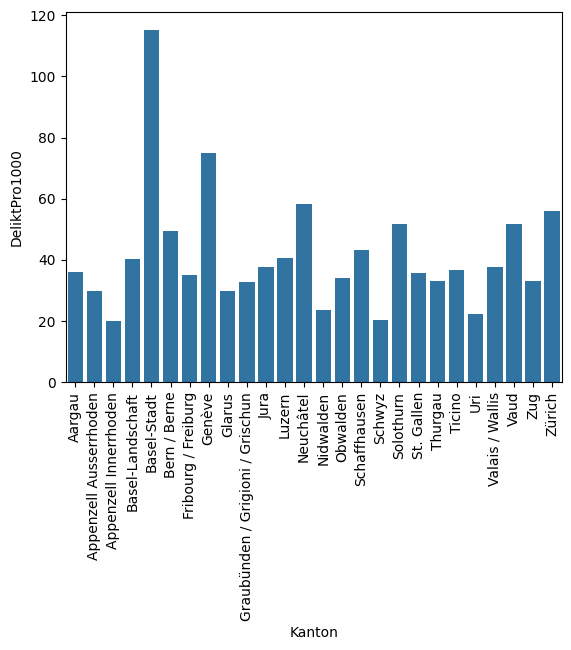

In [92]:
import seaborn as sns

sns.barplot(temp[temp['Jahr'] == 2021], x='Kanton', y='DeliktPro1000')
plt.xticks(rotation=90)
plt.show()

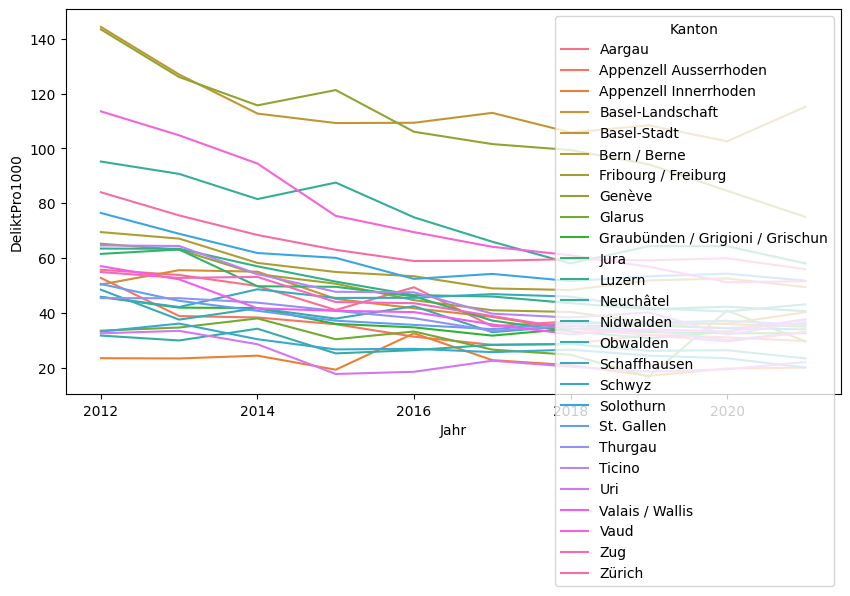

In [94]:
plt.figure(figsize=(10, 5))
sns.lineplot(temp, x='Jahr', y='DeliktPro1000', hue='Kanton')
plt.show()

In [101]:
temp = temp[temp['Jahr']==2021].sort_values('DeliktPro1000', ascending=False)
temp.iloc[:3]

,Kanton,Jahr,Einwohnerzahl_Kanton,Fallzahlen,DeliktPro1000
49,Basel-Stadt,2021,196036.0,22585.0,115.208431
79,Genève,2021,509448.0,38234.0,75.049858
129,Neuchâtel,2021,176166.0,10233.0,58.087259


### Aufgabe 2 (28 Punkte)

Du hast eine neue Stelle bei einer Immobilienplattform begonnen, die Personen auf dem Web ihre Häuser zum Verkauf ausschreiben lässt. Dabei kann auch das Baujahr angegeben werden, aus unbekannten Gründen tun dies jedoch nur etwa 45\% aller Benutzer:innen. Nun möchte deine Firma evaluieren, ob es Sinn machen könnte, dieses Baujahr mit einem Imputationsmodell zu ergänzen.

Als ersten Arbeitsauftrag bekommst du eine stark abgespeckte Version des Datensets und sollst prüfen, welche Genauigkeit realistisch möglich ist.

### a) (2 Punkte)

Lies das Datenset `housing.csv` als erstes einmal ein und verschaffe dir eine Übersicht. Untersuche insbesondere, welcher Anteil der Werte pro Spalte fehlt. Die genaue Bedeutung der einzelnen Spalten spielt für diese Aufgabe keine Rolle (die Namen sind bis auf `Distance` intuitiv, diese steht für die Distanz vom geschäftlichen Stadtzentrum).

In [194]:
df = pd.read_csv('housing.csv')
df

,Rooms,Price,Distance,Bedroom2,Bathroom,Landsize,BuildingArea,YearBuilt
0,2,1480000.0,2.5,2.0,1.0,202.0,NaN,NaN
1,2,1035000.0,2.5,2.0,1.0,156.0,79.0,1900.0
2,3,1465000.0,2.5,3.0,2.0,134.0,150.0,1900.0
3,3,850000.0,2.5,3.0,2.0,94.0,NaN,NaN
4,4,1600000.0,2.5,3.0,1.0,120.0,142.0,2014.0
...,...,...,...,...,...,...,...,...
27242,4,1480000.0,6.3,4.0,1.0,593.0,NaN,NaN
27243,2,888000.0,6.3,2.0,2.0,98.0,104.0,2018.0
27244,2,705000.0,6.3,2.0,1.0,220.0,120.0,2000.0
27245,3,1140000.0,6.3,NaN,NaN,NaN,NaN,NaN


In [195]:
nas = (df.isna().mean()*100)
nas

Rooms            0.000000
Price            0.000000
Distance         0.003670
Bedroom2        23.639300
Bathroom        23.661321
Landsize        34.003744
BuildingArea    60.891107
YearBuilt       55.650163
dtype: float64

### b) (6 Punkte)

Damit dein Imputationsmodell auf Daten imputen kann, die es vorher noch nicht gesehen hat, erstellst du dir als erstes ein Trainings- und Testset. Mische dazu die Zeilen des Datensets neu und teile es in zwei Teile - die ersten 60% in das Trainingset und die restlichen 40% in das Testset. Lösche alle Zeilen aus dem Testset, in denen `YearBuilt` fehlt. Kopiere danach die `YearBuilt`-Spalte aus dem Testset in eine separate Variable `year_built_test` und setze anschliessend im Testset alle `YearBuilt`-Werte auf NA bzw. NaN. Stelle sicher, dass alles sauber funktioniert hat.

In [196]:
df = df.sample(frac=1)
size = len(df)
splitting_point = int(size*0.6)
df_train = df.iloc[:splitting_point]
df_test = df.iloc[splitting_point:]

print(f'Original Size:{size}, splittingpoint:{splitting_point}, dfTrain:{len(df_train)}, dfTest:{len(df_test)}')

Original Size:27247, splittingpoint:16348, dfTrain:16348, dfTest:10899


In [197]:
df_test = df_test[~df_test['YearBuilt'].isna()]
df_test

,Rooms,Price,Distance,Bedroom2,Bathroom,Landsize,BuildingArea,YearBuilt
15714,4,940000.0,6.2,4.0,2.0,510.0,196.0,2016.0
7125,2,722000.0,3.3,2.0,1.0,0.0,86.0,2003.0
25357,3,955000.0,3.0,3.0,2.0,86.0,122.0,2004.0
21731,3,542000.0,13.1,3.0,1.0,642.0,123.0,2008.0
13294,2,530000.0,4.3,2.0,1.0,81.0,88.0,1980.0
...,...,...,...,...,...,...,...,...
18782,3,945000.0,19.9,3.0,2.0,NaN,133.0,1980.0
560,4,1100000.0,12.2,3.0,2.0,803.0,152.0,1970.0
15215,4,2530000.0,7.8,4.0,2.0,637.0,306.0,1936.0
10473,2,630000.0,4.5,2.0,1.0,0.0,59.0,1970.0


In [198]:
df_test

,Rooms,Price,Distance,Bedroom2,Bathroom,Landsize,BuildingArea,YearBuilt
15714,4,940000.0,6.2,4.0,2.0,510.0,196.0,2016.0
7125,2,722000.0,3.3,2.0,1.0,0.0,86.0,2003.0
25357,3,955000.0,3.0,3.0,2.0,86.0,122.0,2004.0
21731,3,542000.0,13.1,3.0,1.0,642.0,123.0,2008.0
13294,2,530000.0,4.3,2.0,1.0,81.0,88.0,1980.0
...,...,...,...,...,...,...,...,...
18782,3,945000.0,19.9,3.0,2.0,NaN,133.0,1980.0
560,4,1100000.0,12.2,3.0,2.0,803.0,152.0,1970.0
15215,4,2530000.0,7.8,4.0,2.0,637.0,306.0,1936.0
10473,2,630000.0,4.5,2.0,1.0,0.0,59.0,1970.0


In [199]:
year_built_test = df_test['YearBuilt']
year_built_test.to_numpy()

array([2016., 2003., 2004., ..., 1936., 1970., 1930.])

In [200]:
df_test['YearBuilt'] = np.nan
df_test

,Rooms,Price,Distance,Bedroom2,Bathroom,Landsize,BuildingArea,YearBuilt
15714,4,940000.0,6.2,4.0,2.0,510.0,196.0,NaN
7125,2,722000.0,3.3,2.0,1.0,0.0,86.0,NaN
25357,3,955000.0,3.0,3.0,2.0,86.0,122.0,NaN
21731,3,542000.0,13.1,3.0,1.0,642.0,123.0,NaN
13294,2,530000.0,4.3,2.0,1.0,81.0,88.0,NaN
...,...,...,...,...,...,...,...,...
18782,3,945000.0,19.9,3.0,2.0,NaN,133.0,NaN
560,4,1100000.0,12.2,3.0,2.0,803.0,152.0,NaN
15215,4,2530000.0,7.8,4.0,2.0,637.0,306.0,NaN
10473,2,630000.0,4.5,2.0,1.0,0.0,59.0,NaN


### c) (6 Punkte)

Nun bist du bereit zum Imputieren. Trainiere ein KNN-Imputationsmodell (mit jeweils 4 Nachbarn) auf dem Trainingset und imputiere dann damit die Werte für `YearBuilt` im Testset. Vergleiche die imputierten Werte mit den tatsächlichen Werten, indem du den RMSE berechnest:

$$\text{RMSE} = \sqrt{\frac1n \sum_{i=1}^n (y_i-\hat{y}_i)^2},$$

wobei $y$ die tatsächlichen Werte und $\hat{y}$ die imputierten Werte bezeichne. Wie viele Jahre liegt dein Modell damit typischerweise daneben?

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.metrics import root_mean_squared_error as rmse


imputer = KNNImputer(n_neighbors=4)
imputer.fit(df_train.to_numpy())

y_hat = imputer.transform(df_test.to_numpy())

In [219]:

y_hat[:, 7]

array([1953.75, 1976.5 , 1982.25, ..., 1929.75, 1979.75, 1973.25])

In [220]:

rmse(year_built_test, y_hat[:, 7])


36.97267343721778

### d) (8 Punkte)

In Teilaufgabe c) hast du ein KNN-Imputationsmodell mit 4 Nachbarn angewendet. Du möchtest nun prüfen, ob es allenfalls eine bessere Anzahl Nachbarn gibt. Schreibe dazu in einem ersten Schritt eine Funktion `compute_rmse()`, die als Argumente dein Training- und Testset, die tatsächlichen Werte `year_built_test` und die Parameter für den Imputer (oder gleich die Imputer-Klasse) nimmt.

Benutze anschliessend die Funktion, um die RMSE-Werte für verschiedene Anzahlen von Nachbarn zu berechnen. Verwende konkret die Anzahlen 1, 3, 5, 10, 20 und 30. Stelle RMSE gegen Anzahl Nachbarn graphisch dar.

In [260]:
def compute_rmse(trainset, testset, year_built_test, imputerClass):
    imputerClass.fit(trainset.to_numpy())
    
    y_hat = imputerClass.transform(testset.to_numpy())
    
    return rmse(year_built_test, y_hat[:, 7])
    

In [261]:
results= []
neighbors = [1, 3, 5, 10, 20, 30]

for neighbor in neighbors:
    imputer = KNNImputer(n_neighbors=neighbor)
    temp_result=compute_rmse(testset=df_test, trainset=df_train, year_built_test=year_built_test, imputerClass=imputer)
    results.append(temp_result)
    print(temp_result)

44.77150213814606
37.67640765890624
36.49553245584854
35.40395422852672
35.09597272745758
35.1362431094437


In [262]:
results = [results] + [neighbors]
results_df = pd.DataFrame(results)
results_df

,0,1,2,3,4,5
0,44.771502,37.676408,36.495532,35.403954,35.095973,35.136243
1,1.000000,3.000000,5.000000,10.000000,20.000000,30.000000


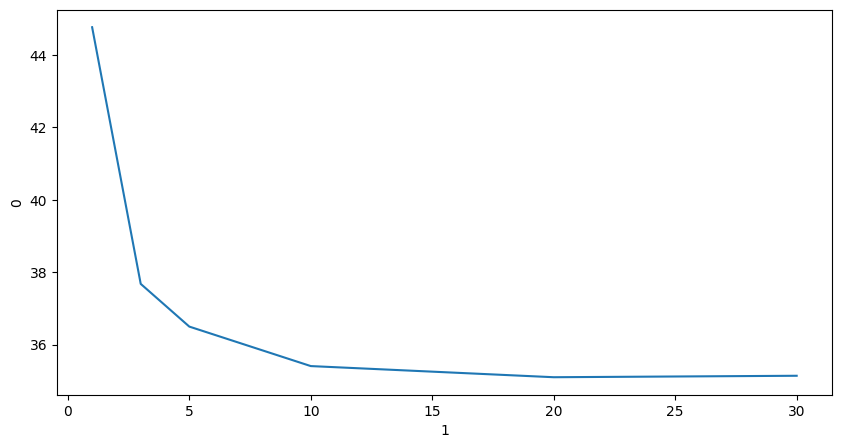

In [263]:

plt.figure(figsize=(10, 5))
sns.lineplot(results_df, x=results_df.iloc[1], y=results_df.iloc[0])
plt.show()

### e) (6 Punkte)

Du bekommst den Tipp, dass ein KNN-Imputationsmodell noch besser funktioniere, wenn die Daten zuerst standard-skaliert werden, dann imputiert wird und dann die Daten wieder zurückskaliert werden. Erstelle eine entsprechende Funktion `compute_rmse_scaled()`, die so vorgeht und erstelle eine entsprechende Version des Plots aus Teilaufgabe d). Erreichst du einen tieferen RMSE?

In [276]:
def compute_rmse_scaled(trainset, testset, year_built_test, imputerClass):
    
    
    trainset_norm = (trainset - trainset.mean())/trainset.std()
    testset_norm = (testset - testset.mean())/testset.std()
    
    imputerClass.fit(trainset_norm.to_numpy())
    
    
    y_hat = imputerClass.transform(testset_norm.to_numpy())
    
    
    y_hat_backtransform = (y_hat*testset.std()) + testset.mean()  
    
    return rmse(year_built_test, y_hat_backtransform[:, 7])

In [277]:
results= []
neighbors = [1, 3, 5, 10, 20, 30]

for neighbor in neighbors:
    imputer = KNNImputer(n_neighbors=neighbor)
    temp_result=compute_rmse_scaled(testset=df_test, trainset=df_train, year_built_test=year_built_test, imputerClass=imputer)
    results.append(temp_result)
    print(temp_result)
results = [results] + [neighbors]
results_df = pd.DataFrame(results)
results_df

ValueError: Length of values (4803) does not match length of index (8)

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(results_df, x=results_df.iloc[1], y=results_df.iloc[0])
plt.show()